#5. Прогнозирование рядов с сезонной составляющей


Аккуратова Дарья Александровна 337100

студент, 1-й курс, группа S41032, факультет ВШ ЦК

Задание:

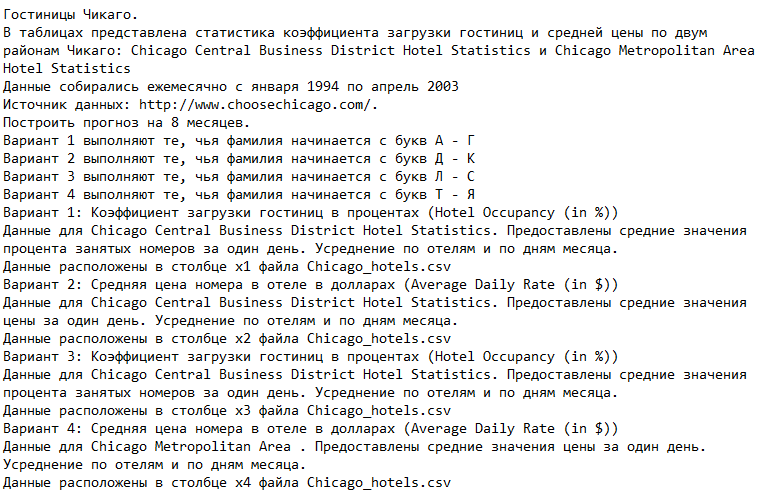

Ответ: 

В данном задании был построен прогноз на 8 месяцев коэффициентов загрузки гостиниц в процентах (Hotel Occupancy (in %)), где представлены средние значения процента занятых номеров за один день, усреднение происходило по отелям и по дням месяца. 

Прогноз коэффицентов для месяцев, начиная с 5-го и заканчивая 12-м, оказался следующим: 74.39437003, 80.51891209, 77.2448247 , 76.47913822, 75.89799505, 80.42659899, 74.0921174 , 52.89842572.

Для наглядного иллюстрирования результатов исторических значений за весь период, подгонки и прогноза на 8 месяцев вперед был представлен график в конце решения. Модель является аддитивной и имеет боковой тренд.

In [37]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [38]:
df = pd.read_csv('Задачи_для_лабораторной_5.csv', delimiter=';',  decimal=",", encoding='utf-8')
df.tail(20)

,date1,date2,x1,x2,x3,x4
100,May,2002,68.5,164.05,62.4,114.95
101,June,2002,78.6,165.81,71,117.17
102,July,2002,72.5,139.8,66.4,104.3
103,August,2002,71.9,142.52,66.9,105.4
104,September,2002,74.3,166.59,66.6,117.2
105,October,2002,77.1,173.08,67.7,120.35
106,November,2002,69.8,175.82,59.4,113.14
107,December,2002,54.8,148.95,46.6,99.1
108,January,2003,51.6,132.89,45.3,92.88
109,February,2003,52.7,127.44,50.8,90.99


In [39]:
df.shape

(120, 6)

In [40]:
df.columns

Index(['date1', 'date2', 'x1', 'x2', 'x3', 'x4'], dtype='object')

In [41]:
# Выберем данные для заданного варианта

df = df[['date1','x1']]
df

,date1,x1
0,January,44.3
1,February,54.7
2,March,61.9
3,April,69.1
4,May,70.8
...,...,...
115,August,
116,September,
117,October,
118,November,


In [42]:
df.tail(10)

,date1,x1
110,March,65
111,April,69
112,May,
113,June,
114,July,
115,August,
116,September,
117,October,
118,November,
119,December,


In [43]:
# Выберем часть выборки с ненулевыми значениями

df = df.iloc[:112,:]
df

,date1,x1
0,January,44.3
1,February,54.7
2,March,61.9
3,April,69.1
4,May,70.8
...,...,...
107,December,54.8
108,January,51.6
109,February,52.7
110,March,65


In [44]:
df.shape

(112, 2)

In [45]:
# Заметим, что месяцы в датафрейме отображаются в нечисловом формате 

df.head(13)

,date1,x1
0,January,44.3
1,February,54.7
2,March,61.9
3,April,69.1
4,May,70.8
5,June,76.9
6,July,77.5
7,August,75
8,September,82.2
9,October,84.7


In [46]:
  # Преобразуем месяцы в числовые значения

look_up = {'January': '1', 'February': '2', 'March': '3', 'April': '4', 
           'May': '5', 'June': '6', 'July': '7', 'August': '8', 'September': '9', 
           'October': '10', 'November': '11', 'December': '12'}

date1_col =  df['date1'].apply(lambda x: look_up[x])
x1_col = df['x1']

df = pd.DataFrame({
    'date1': date1_col ,
    'x1': x1_col
})

df 

,date1,x1
0,1,44.3
1,2,54.7
2,3,61.9
3,4,69.1
4,5,70.8
...,...,...
107,12,54.8
108,1,51.6
109,2,52.7
110,3,65


In [47]:
# Посмотрим на тип данных столбцов

df.dtypes

date1    object
x1       object
dtype: object

In [48]:
# Преобразуем тип данных

df['x1']=df['x1'].astype(float)
df['date1']=df['date1'].astype(int)
df.dtypes

date1      int64
x1       float64
dtype: object

Text(0, 0.5, 'log10 ')

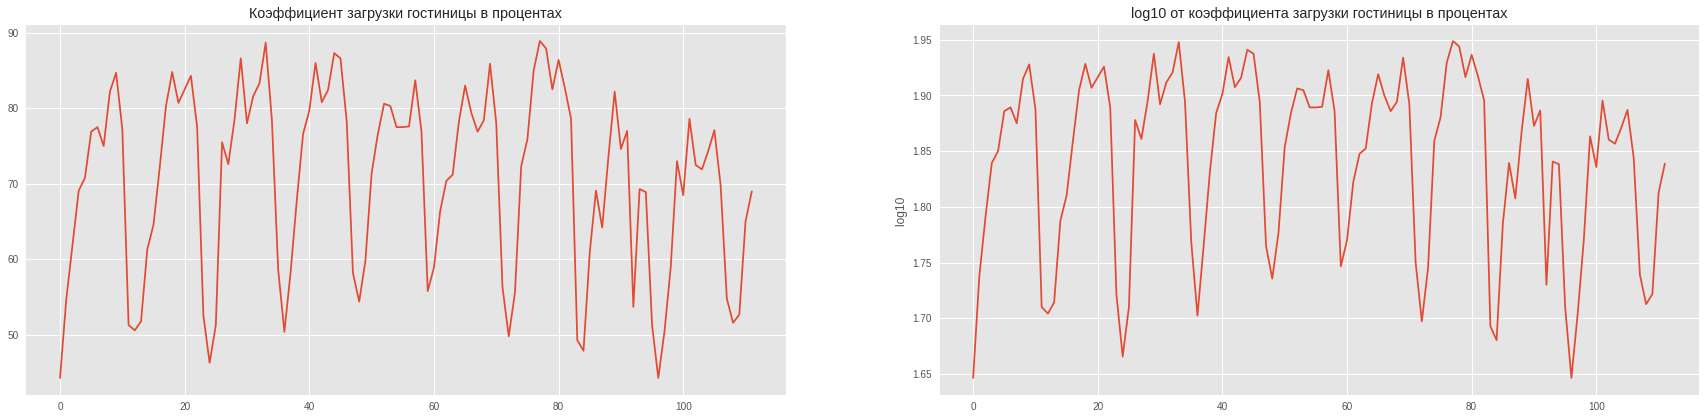

In [49]:
# Построим графики 

fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(221)
df['x1'].plot(ax=ax1)
ax1.set_title(u'Коэффициент загрузки гостиницы в процентах')
ax1.set_ylabel(u'')

ax2 = fig.add_subplot(222)
pd.Series(np.log10(df['x1'])).plot(ax=ax2) 
ax2.set_title(u'log10 от коэффициента загрузки гостиницы в процентах')
ax2.set_ylabel(u'log10 ')

Оба графика на первый взгляд очень похожи.

Анализируем графики:
1. Есть ли у временного ряда тренд? - Да, на графике присутствует боковой тренд.
2. Есть ли у временного ряда сезонность? - Да, присутствует аддитивная сезонность. (Однако вполне возможно присутствует и мультипликативная сезонность, когда от 0 до 60 по оси икс так называемый "конус" сужается, а после, от значений 60 до 100+ "конус" расширяется. Более четкий ответ на данный вопрос можно дать с бОльшим объемом данных. На данный момент остановимся на аддитивной сезонности)
3. Меняет ли ряд свой характер? - Нет, ряд сохраняет свой характер.
4. Есть ли у ряда выбросы? - Отсутствуют.
5. Есть ли уряда пропуски? - Отсутствуют.

Вывод: модель аддитивная.

Будем прогнозировать логарифм коэффициента загрузки гостиницы в процентах с помощью линейной регрессии.

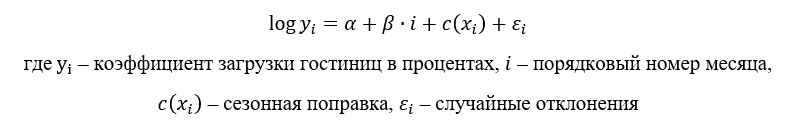

Прологарифмируем временной ряд и добавим в таблицу. Создадим предиктор 'month_num' - номер наблюдения и одновременно номер месяца, считая от первого наблюдения. Тем самым зададим линейный тренд


In [50]:
df['month_num'] = range(1, len(df) + 1)
df['log_y'] = np.log10(df['x1'])
df

,date1,x1,month_num,log_y
0,1,44.3,1,1.646404
1,2,54.7,2,1.737987
2,3,61.9,3,1.791691
3,4,69.1,4,1.839478
4,5,70.8,5,1.850033
...,...,...,...,...
107,12,54.8,108,1.738781
108,1,51.6,109,1.712650
109,2,52.7,110,1.721811
110,3,65.0,111,1.812913


In [51]:
# Удаляем переменные, которые в модели не нужны

df_two = df.drop(columns=['date1', 'x1'])
df_two

,month_num,log_y
0,1,1.646404
1,2,1.737987
2,3,1.791691
3,4,1.839478
4,5,1.850033
...,...,...
107,108,1.738781
108,109,1.712650
109,110,1.721811
110,111,1.812913


In [52]:
# Разделим получившуюся выборку на две части

# 1 часть
df_concat = df_two.iloc[108:112]
df_concat

,month_num,log_y
108,109,1.712650
109,110,1.721811
110,111,1.812913
111,112,1.838849


In [53]:
# 2 часть
df_two = df_two.iloc[:108,:]
df_two

,month_num,log_y
0,1,1.646404
1,2,1.737987
2,3,1.791691
3,4,1.839478
4,5,1.850033
...,...,...
103,104,1.856729
104,105,1.870989
105,106,1.887054
106,107,1.843855


In [54]:
# Создадим новые переменные - индикаторы месяцев для выборки, 
# где каждый месяц повторяется ровно 9 раз за полных 9 лет

df_two['m01'] = [1,0,0,0,0,0,0,0,0,0,0,0]*9
df_two['m02'] = [0,1,0,0,0,0,0,0,0,0,0,0]*9
df_two['m03'] = [0,0,1,0,0,0,0,0,0,0,0,0]*9
df_two['m04'] = [0,0,0,1,0,0,0,0,0,0,0,0]*9
df_two['m05'] = [0,0,0,0,1,0,0,0,0,0,0,0]*9
df_two['m06'] = [0,0,0,0,0,1,0,0,0,0,0,0]*9
df_two['m07'] = [0,0,0,0,0,0,1,0,0,0,0,0]*9
df_two['m08'] = [0,0,0,0,0,0,0,1,0,0,0,0]*9
df_two['m09'] = [0,0,0,0,0,0,0,0,1,0,0,0]*9
df_two['m10'] = [0,0,0,0,0,0,0,0,0,1,0,0]*9
df_two['m11'] = [0,0,0,0,0,0,0,0,0,0,1,0]*9
df_two['m12'] = [0,0,0,0,0,0,0,0,0,0,0,1]*9

df_two.head(13)

,month_num,log_y,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,1,1.646404,1,0,0,0,0,0,0,0,0,0,0,0
1,2,1.737987,0,1,0,0,0,0,0,0,0,0,0,0
2,3,1.791691,0,0,1,0,0,0,0,0,0,0,0,0
3,4,1.839478,0,0,0,1,0,0,0,0,0,0,0,0
4,5,1.850033,0,0,0,0,1,0,0,0,0,0,0,0
5,6,1.885926,0,0,0,0,0,1,0,0,0,0,0,0
6,7,1.889302,0,0,0,0,0,0,1,0,0,0,0,0
7,8,1.875061,0,0,0,0,0,0,0,1,0,0,0,0
8,9,1.914872,0,0,0,0,0,0,0,0,1,0,0,0
9,10,1.927883,0,0,0,0,0,0,0,0,0,1,0,0


In [55]:
# Создадим новые переменные - индикаторы месяцев для выборки,
# где только первые четыре месяца повторяются ровно один раз

df_concat['m01'] = [1,0,0,0]
df_concat['m02'] = [0,1,0,0]
df_concat['m03'] = [0,0,1,0]
df_concat['m04'] = [0,0,0,1]

df_concat.head()

,month_num,log_y,m01,m02,m03,m04
108,109,1.712650,1,0,0,0
109,110,1.721811,0,1,0,0
110,111,1.812913,0,0,1,0
111,112,1.838849,0,0,0,1


In [56]:
# Увеличиваем значения столбца 'month_num' с помощью соединения этих двух таблиц

df_ = pd.concat([df_two, df_concat], ignore_index=True)
df_

,month_num,log_y,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,1,1.646404,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.737987,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.791691,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.839478,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1.850033,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,108,1.738781,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
108,109,1.712650,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,110,1.721811,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,111,1.812913,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Заменяем значения NaN на нулевые

df_ = df_.fillna(0)
df_

,month_num,log_y,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,1,1.646404,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.737987,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.791691,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.839478,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1.850033,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,108,1.738781,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
108,109,1.712650,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,110,1.721811,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,111,1.812913,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Создаем матрицу предикторов, убирая столбец откликов и столбец индикаторов
# базового месяца 'm01' (из-за коллинеарности)

X = df_.drop(columns=['log_y', 'm01'])
y = df_['log_y']

In [59]:
# Осуществим подгонку модели

model = LinearRegression()
model.fit(X, y)

LinearRegression()

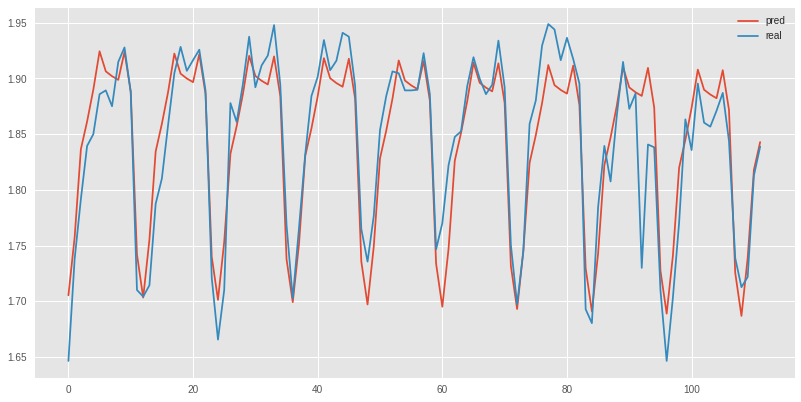

In [60]:
# Сравним подгонку и ряд логарифмов

pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y
})

fig3 = plt.figure(figsize=(30,15))
ax3 = fig3.add_subplot(221)
pred.plot(ax=ax3)

In [61]:
# Посмотрим насколько хорошо данная модель описывает исторические данные

pred.head(10)

,pred,real
0,1.705347,1.646404
1,1.757433,1.737987
2,1.836519,1.791691
3,1.861410,1.839478
4,1.890053,1.850033
5,1.924411,1.885926
6,1.906383,1.889302
7,1.902056,1.875061
8,1.898744,1.914872
9,1.923913,1.927883


In [62]:
# Готовим матрицу значений предикторов df_three для вычисления прогнозов на 8 месяцев вперед
# Сначала добавляем в нее время (номер месяца)

df_three = pd.DataFrame()

df_three['month_num'] = range(109, 121)
df_three

,month_num
0,109
1,110
2,111
3,112
4,113
5,114
6,115
7,116
8,117
9,118


In [63]:
# Добавляем индикаторы месяцев. Снова исключаем базовый месяц

#df_three['m01'] = [1,0,0,0,0,0,0,0,0,0,0,0]
df_three['m02'] = [0,1,0,0,0,0,0,0,0,0,0,0]
df_three['m03'] = [0,0,1,0,0,0,0,0,0,0,0,0]
df_three['m04'] = [0,0,0,1,0,0,0,0,0,0,0,0]
df_three['m05'] = [0,0,0,0,1,0,0,0,0,0,0,0]
df_three['m06'] = [0,0,0,0,0,1,0,0,0,0,0,0]
df_three['m07'] = [0,0,0,0,0,0,1,0,0,0,0,0]
df_three['m08'] = [0,0,0,0,0,0,0,1,0,0,0,0]
df_three['m09'] = [0,0,0,0,0,0,0,0,1,0,0,0]
df_three['m10'] = [0,0,0,0,0,0,0,0,0,1,0,0]
df_three['m11'] = [0,0,0,0,0,0,0,0,0,0,1,0]
df_three['m12'] = [0,0,0,0,0,0,0,0,0,0,0,1]

# Выбираем только 8 последующих месяцев, для которых следует сделать прогноз
df_three = df_three[4:12]
df_three

,month_num,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
4,113,0,0,0,1,0,0,0,0,0,0,0
5,114,0,0,0,0,1,0,0,0,0,0,0
6,115,0,0,0,0,0,1,0,0,0,0,0
7,116,0,0,0,0,0,0,1,0,0,0,0
8,117,0,0,0,0,0,0,0,1,0,0,0
9,118,0,0,0,0,0,0,0,0,1,0,0
10,119,0,0,0,0,0,0,0,0,0,1,0
11,120,0,0,0,0,0,0,0,0,0,0,1


In [64]:
# Прогноз для логарифмов на 8 месяцев (с 5 по 12)

model.predict(df_three)

array([1.87154007, 1.9058979 , 1.88786939, 1.88354299, 1.8802303 ,
       1.9053997 , 1.86977201, 1.72344275])

In [65]:
# По прогнозу для логарифмов вычисляем прогноз для исходного ряда

y_one = 10**model.predict(df_three)
y_one 

array([74.39437003, 80.51891209, 77.2448247 , 76.47913822, 75.89799505,
       80.42659899, 74.0921174 , 52.89842572])

Этот ряд - и есть прогноз.

Далее построим графики, чтобы проверить разумность полученного ответа. Далее готовим данные для графика.

In [66]:
# К матрице pred с подгонкой добавим столбец 'forecast' с прогнозом. 
# В матрице информация об исторических значениях с 1-го по 112-е,
# поэтому для этих месяцев значение прогноза отсутствует.

pred['forecast'] = np.nan
pred

,pred,real,forecast
0,1.705347,1.646404,NaN
1,1.757433,1.737987,NaN
2,1.836519,1.791691,NaN
3,1.861410,1.839478,NaN
4,1.890053,1.850033,NaN
...,...,...,...
107,1.725500,1.738781,NaN
108,1.686833,1.712650,NaN
109,1.738920,1.721811,NaN
110,1.818005,1.812913,NaN


In [67]:
# Продолжение предыдущей матрицы. Оно содержит спрогнозированные значения для месяцев с 113-го по 120-й.
# Для этих месяцев есть спрогнозированные значения, но нет исторических данных и подгонки.
# Порядок столбцов не важен. Имена столбцов должны совпадать с именами в матрице pred выше

pred_two = pd.DataFrame(model.predict(df_three), columns=['forecast'])
pred_two['real'] = np.nan
pred_two['pred'] = np.nan

pred_two

,forecast,real,pred
0,1.871540,NaN,NaN
1,1.905898,NaN,NaN
2,1.887869,NaN,NaN
3,1.883543,NaN,NaN
4,1.880230,NaN,NaN
5,1.905400,NaN,NaN
6,1.869772,NaN,NaN
7,1.723443,NaN,NaN


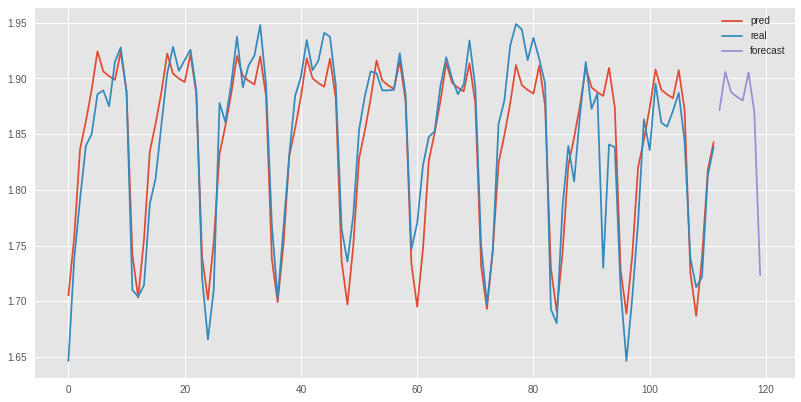

In [68]:
# Объединяем матрицы, задаем новые индексы

pred_four = pd.concat(
    [pred, pred_two],
    sort=False
).reset_index(drop=True)

fig4 = plt.figure(figsize=(30,15))
ax4 = fig4.add_subplot(221)
pred_four.plot(ax=ax4)

In [69]:
# От ряда из логарифмов возвращаемся к исходному ряду (берем все числа и потенцируем)

pred_five = 10**pred_four
pred_five

,pred,real,forecast
0,50.739539,44.3,NaN
1,57.204912,54.7,NaN
2,68.630748,61.9,NaN
3,72.679183,69.1,NaN
4,77.634266,70.8,NaN
...,...,...,...
115,NaN,NaN,76.479138
116,NaN,NaN,75.897995
117,NaN,NaN,80.426599
118,NaN,NaN,74.092117


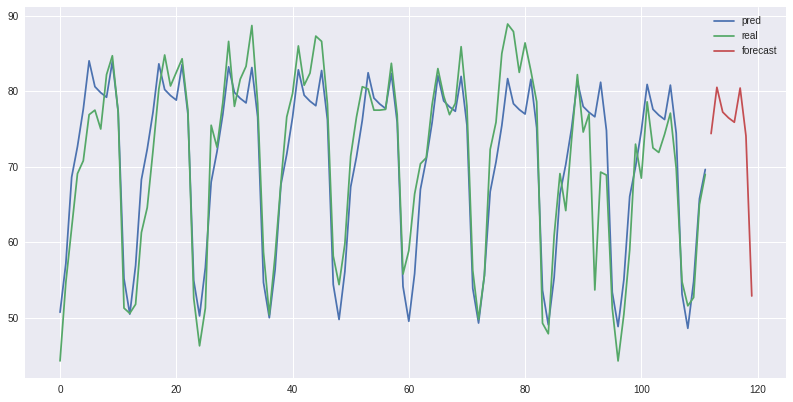

In [70]:
# Конечный график,
# где pred - подгонка, real - исторические значения, forecast - прогноз

matplotlib.style.use('seaborn')

fig5 = plt.figure(figsize=(30,15))
ax5 = fig5.add_subplot(221)
pred_five.plot(ax=ax5)